In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import io

In [3]:
from google.colab import files
uploaded = files.upload()

Saving all_data.csv to all_data.csv


In [4]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


Since 'United States of America' is a string way bigger than other countries names in this analysis, it's quite usefull to change it to 'USA', to keep  tick labels tidy in future graphs.

In [6]:
df['Country'] = df['Country'].replace('United States of America','USA') 

##Life Expectancy Evolution

We can begin looking how life expectancy varied along the years in different countries.

Text(0.5, 1.0, 'Life Expectancy Evolution - All countries')

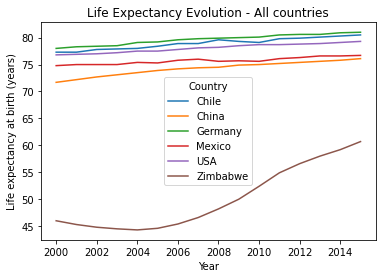

In [7]:
sns.lineplot(data=df, x='Year', y='Life expectancy at birth (years)', hue='Country')
plt.title('Life Expectancy Evolution - All countries')

It is clear that Zimbabwe had life expectancy values way smaller than other countries, what makes it difficult to analyse it altogether. Let´s then plot two separate charts (with and without Zimbabwe), to better understand the data.

Text(0.5, 1.0, 'Life Expectancy Evolution - Only Zimbabwe')

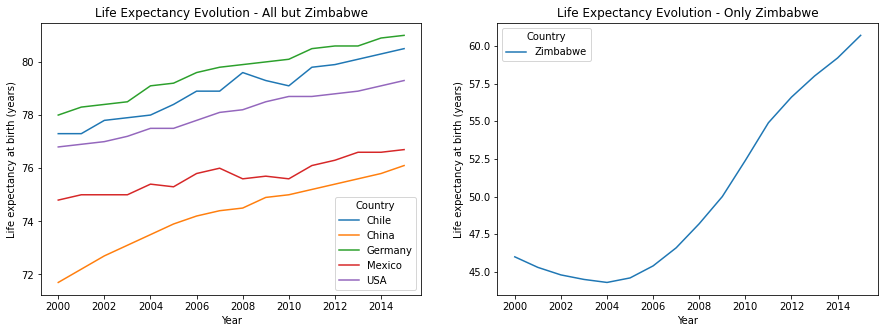

In [8]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,2,1)
ax1 =sns.lineplot(data=df, x='Year', y='Life expectancy at birth (years)', hue=df.Country[df.Country != 'Zimbabwe'])
plt.title('Life Expectancy Evolution - All but Zimbabwe')

ax2 = plt.subplot(1,2,2)
ax1 =sns.lineplot(data=df, x='Year', y='Life expectancy at birth (years)', hue=df.Country[df.Country == 'Zimbabwe'])
plt.title('Life Expectancy Evolution - Only Zimbabwe')

On the left graph, it's clear that all the countries shown an evolution on life expectancy throughout time. China was the country to show the quicker improvement along the years, but in 2014 was still the one with smaller values when compared to Chile, Germany, Mexico and USA.

On the right graph, on the other hand, Zimbabwe's life expectation got worse between 2000 and 2004, quickly improving from this year on. It's not easy to exactly determine why Zimbabwe was the only country not to show a continuous improvment, but extreme poverty and turbulent internal political/belical environment seem to be determinant to make things more difficult.

##Gross Domestic Product (GDP) Evolution

Gross Domestic Product (or simply GDP), is an offical measure that shows the sum of everything produced by a country. Learning how this changed over time is a reliable way of determine how wealthy a country was along the years.

Text(0.5, 1.0, 'GDP Evolution')

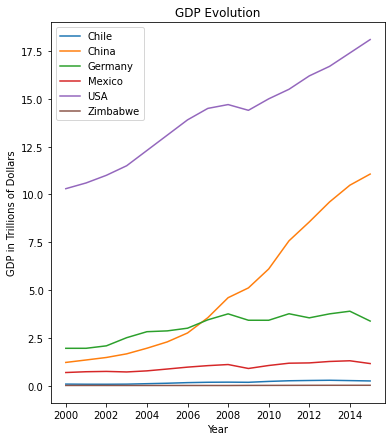

In [9]:
df['GDP in Trillions of Dollars'] = df.GDP/1e12

plt.figure(figsize=(6, 7))
ax = sns.lineplot(data=df, x='Year', y='GDP in Trillions of Dollars', hue='Country')
plt.legend(df.Country.unique())
plt.title('GDP Evolution')
#plt.ticklabel_format(style='plain')
#tick = mtick.StrMethodFormatter('{x:.0}')
#ax.yaxis.set_major_formatter(tick)
#plt.ylim([0, 5])

It's not a surprise to see USA with the biggest GDP along the years, since it has been the biggest economy for decades. China, once again, shows a great improvement in just a bit more than a decade. Around 2008 nearly all countries shown a GDP reduction, even though at different levels. The main reason is clearly the global economic crisis, originated at 2008 in the USA, with the subprime mortgage meltdown.

Text(0.5, 1.0, 'GDP Evolution - Lowest GDPs')

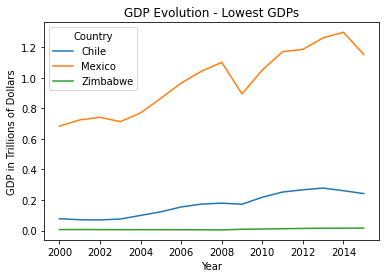

In [10]:
sns.lineplot(data=df, x='Year', y='GDP in Trillions of Dollars', hue=df.Country[(df.Country == 'Zimbabwe') | (df.Country == 'Chile') | (df.Country == 'Mexico')])
plt.title('GDP Evolution - Lowest GDPs')

Looking specifically to Chile, Mexico and Zimbabwe (countries with the lowest GDP among the studied), we can see that Mexico falls within the same behavior than developed countries, with GDP values improving along time, but feeling a strong setback around 2008. Chile also seems to improve along time, on average. But is nearly impossible to draw any conclusions about Zimbabwe. Let's then plot a separate graph, with a more appropriate axis scale

Text(0.5, 1.0, 'GDP Evolution - Only Zimbabwe')

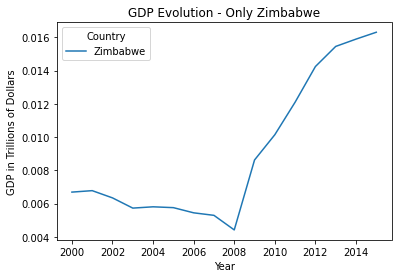

In [11]:
sns.lineplot(data=df, x='Year', y='GDP in Trillions of Dollars', hue=df.Country[(df.Country == 'Zimbabwe')])
plt.title('GDP Evolution - Only Zimbabwe')

Instead of getting worse, we can see that 2008 was a pivotal moment to Zimbabwe's economy, with a massive improvement following on. It is quite obvious now that this country was less vulnerable to internation economic turmoil, with internal affairs playing a more decisive role in it's development. Clearly a further study is necessary to fully comprehend Zimbabwe's economic change throughout time. 

##GDP versus Life Expectancy


(70.0, 85.0)

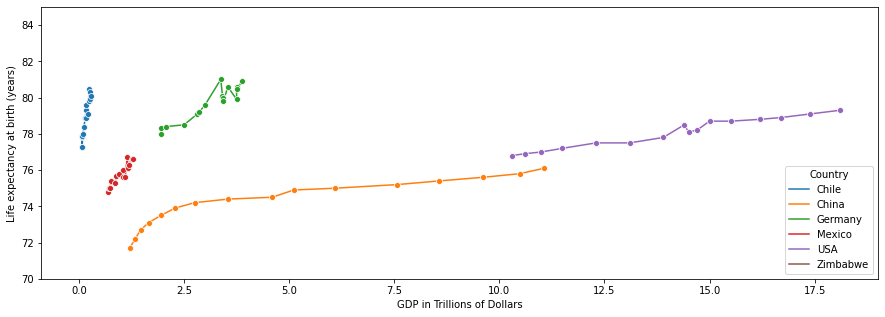

In [28]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, y='Life expectancy at birth (years)', x='GDP in Trillions of Dollars', marker='o', hue='Country')
plt.ylim([70, 85])
#plt.xlim([0, 4])

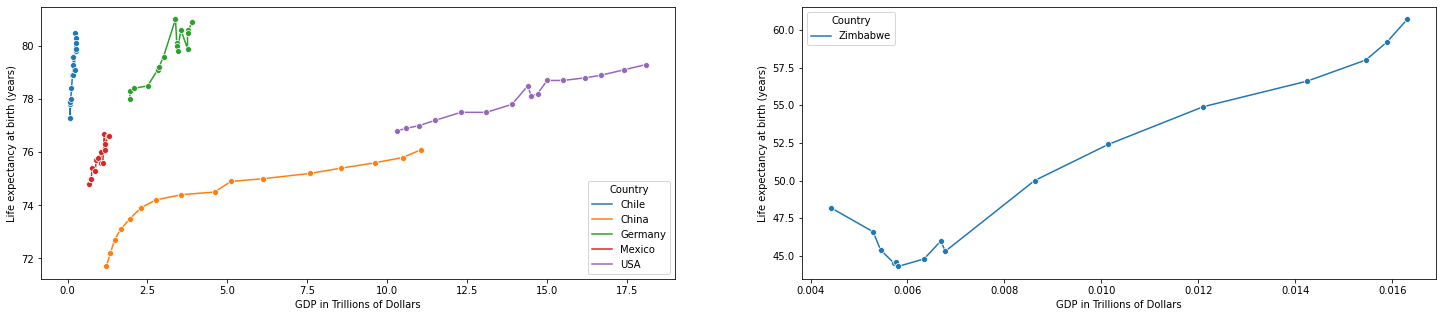

In [16]:
plt.figure(figsize=(25,5))

ax3 = plt.subplot(121)
ax3 = sns.lineplot(data=df, y='Life expectancy at birth (years)', x='GDP in Trillions of Dollars', marker='o', hue=df.Country[(df.Country != 'Zimbabwe')])
#plt.xlim([0,1.5])

ax4 = plt.subplot(122)
#ax5 = ax4.twiny()
#ax5.set_xticks(df['Year'])

ax4 = sns.lineplot(data=df, y='Life expectancy at birth (years)', x='GDP in Trillions of Dollars', marker='o', hue=df.Country[df.Country == 'Zimbabwe'])
#ax5 = sns.lineplot(data=df, x='Year', y='GDP', marker='o', ax=ax4, hue=df.Country[df.Country == 'Zimbabwe']) 



In [27]:
def corr(country_name):
  df_filt = df[df.Country == country_name]
  correlation = df_filt['Life expectancy at birth (years)'].corr(df_filt['GDP in Trillions of Dollars'])
  print(country_name, correlation)


for country in df.Country.unique():
  corr(country)

Chile 0.9498766659254413
China 0.9085255408648358
Germany 0.9326988982561271
Mexico 0.9322377167847083
USA 0.981709238243026
Zimbabwe 0.9661998955858779


So, it's safe to affirm that between 2000 and 2014, there was a very strong correlation between a GDP increase and an improvement in life expectancy in all countries studied. AS shown, this correlation was also strong in Zimbabwe, showing that even in regions facing internal strugles, is reasonable to expect people to live more, if the country's wealth is improved.
